<a href="https://colab.research.google.com/github/mkhalil7625/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
# Your Work Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/san-andreas/earthquake_data.csv'
earthquake= pd.read_csv(url)
earthquake.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?","Do you think the ""Big One"" will occur in your lifetime?",Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Not at all worried,Not so worried,No,"Yes, one or more minor ones",No,Somewhat familiar,Not so familiar,18 - 29,Male,Prefer not to answer,New England
1,Somewhat worried,Very worried,No,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$75,000 to $99,999",East North Central
2,Not so worried,Somewhat worried,No,"Yes, one or more minor ones",No,Very familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",Pacific
3,Not so worried,Not so worried,No,"Yes, one or more minor ones",No,Very familiar,Not so familiar,18 - 29,Male,"$25,000 to $49,999",West South Central
4,Not so worried,Not so worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Extremely familiar,18 - 29,Male,"$200,000 and up",Middle Atlantic


In [2]:
earthquake.columns

Index(['In general, how worried are you about earthquakes?',
       'How worried are you about the Big One, a massive, catastrophic earthquake?',
       'Do you think the "Big One" will occur in your lifetime?',
       'Have you ever experienced an earthquake?',
       'Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?',
       'How familiar are you with the San Andreas Fault line?',
       'How familiar are you with the Yellowstone Supervolcano?', 'Age',
       'What is your gender?',
       'How much total combined money did all members of your HOUSEHOLD earn last year?',
       'US Region'],
      dtype='object')

In [3]:
earthquake.shape

(1013, 11)

In [4]:
bigone = earthquake['How worried are you about the Big One, a massive, catastrophic earthquake?'].value_counts(normalize = True).reset_index()
bigone

,index,"How worried are you about the Big One, a massive, catastrophic earthquake?"
0,Not at all worried,0.329714
1,Not so worried,0.306022
2,Somewhat worried,0.223100
3,Very worried,0.074038
4,Extremely worried,0.067127


In [0]:
bigone.columns = ['index','percent']
bigone = bigone.set_index('index')

In [0]:
bigone['percent']= bigone['percent']*100
bigone['percent'] = bigone['percent'].round(decimals = 0)

In [7]:
bigone['percent'] = bigone['percent'].astype(int)

bigone

,percent
index,
Not at all worried,33
Not so worried,31
Somewhat worried,22
Very worried,7
Extremely worried,7


In [0]:

plt.style.use('fivethirtyeight')


In [9]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/05/hickey-datalab-sanandreas1.png'
example = Image(url=url, width=400)

display(example)

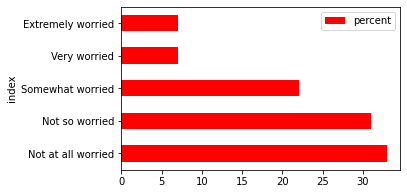

In [10]:
bigone.plot(kind = 'barh',color='red', figsize=(5,3))


In [11]:
display(example)

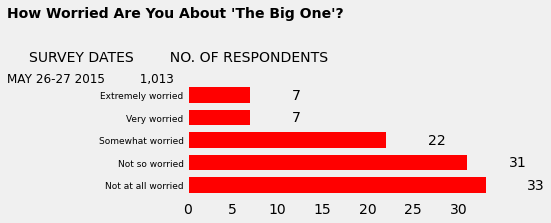

In [52]:
fig, ax = plt.subplots(figsize=(5,2))
#ax.invert_xaxis()
#ax.yaxis.tick_right()
#index = bigone['index'].tolist()
#set the bars
bars=ax.barh(y=bigone.index, width = bigone['percent'],height = 0.7, color = 'red')
labels = bigone['percent'].tolist()
value_format = "{:}"
#to plot the values after the bars
#stackoverflow, needs more updates
def autolabel(ax,bars,text_format):

    for bar in bars:
      text = text_format.format(bar.get_width())
      text_x = bar.get_width() + ax.get_ylim()[1]
      text_y = bar.get_y() + bar.get_height() / 2
      ax.text(text_x,text_y,text,va='center')


#set the title
ax.set_title("How Worried Are You About 'The Big One'?",
             fontsize=14,fontweight='bold',y=1.5, horizontalalignment = 'right')

s="SURVEY DATES        NO. OF RESPONDENTS"
ax.text(-1,6,s,fontsize=14,verticalalignment='top', horizontalalignment = 'center')
s2="MAY 26-27 2015         1,013 "
ax.text(-1,5,s2,fontsize=12,verticalalignment='top', horizontalalignment = 'right')

# to change the fontsize of the yticklabels
for tick in ax.get_yticklabels():
  tick.set_fontsize(9)

ax.grid(False)
# ax.set_xmargin(-0.2)
autolabel(ax,bars,value_format)
plt.show()



In [13]:
labels

[33, 31, 22, 7, 7]

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [53]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2019/12/Mehta.Pollapalooza.1213.png?w=1150 2x'
example = Image(url=url, width=400)

display(example)